In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
codebook = pd.read_csv('RECS 2020 Codebook for Public File - v7.csv').iloc[:,0:3]
codebook.head(5)

,2020 RECS Variable and Response Codebook,Unnamed: 1,Unnamed: 2
0,Variable,Type,Description and Labels
1,DOEID,Num,Unique identifier for each respondent
2,REGIONC,Char,Census Region
3,DIVISION,Char,"Census Division, Mountain Division is divided ..."
4,STATE_FIPS,Char,State Federal Information Processing System Code


In [3]:
codebook[codebook["2020 RECS Variable and Response Codebook"]=="DOLLAREL"]

,2020 RECS Variable and Response Codebook,Unnamed: 1,Unnamed: 2
614,DOLLAREL,Num,"Total electricity cost, in dollars, 2020"


In [3]:
energy = pd.read_csv('recs2020_public_v7.csv')
energy.head()

,DOEID,REGIONC,DIVISION,STATE_FIPS,state_postal,state_name,BA_climate,IECC_climate_code,UATYP10,HDD65,...,EVCHRGHOME,EVCHRGAPT,EVCHRGWKS,EVCHRGBUS,EVCHRGMUNI,EVCHRGDLR,EVCHRGHWY,EVCHRGOTH,EVHOMEAMT,EVCHRGTYPE
0,100001,WEST,Mountain South,35,NM,New Mexico,Mixed-Dry,4B,U,3844,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
1,100002,SOUTH,West South Central,5,AR,Arkansas,Mixed-Humid,4A,U,3766,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
2,100003,WEST,Mountain South,35,NM,New Mexico,Mixed-Dry,4B,U,3819,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
3,100004,SOUTH,South Atlantic,45,SC,South Carolina,Mixed-Humid,3A,U,2614,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,100005,NORTHEAST,Middle Atlantic,34,NJ,New Jersey,Mixed-Humid,4A,U,4219,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


NHSLDMEM
1    0.256920
2    0.379866
3    0.146951
4    0.128460
5    0.052011
6    0.021086
7    0.014706
dtype: float64

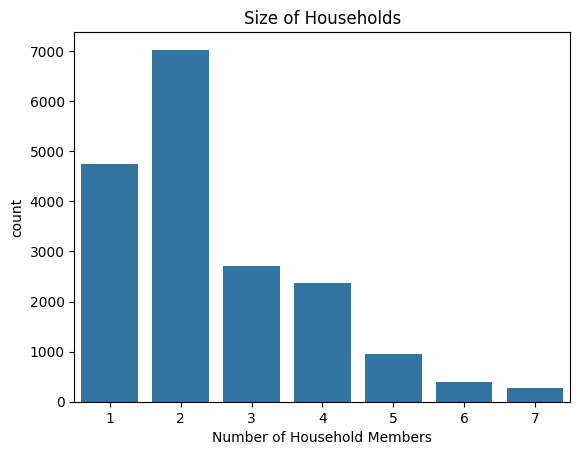

In [9]:
#Compare the distribution of one of your variables to what is expected in the population
sns.countplot(data=energy, x='NHSLDMEM')
plt.xlabel('Number of Household Members')
plt.title('Size of Households')

energy.groupby('NHSLDMEM').size() / len(energy)

### Question 1
Does receiving home energy assistance cause higher electricity usage?

'ENERGYASST20' = Received home energy assistance in 2020 (1: Yes, 0: No, -2: N/A)
'DOLLAREL' = Total electricity cost, in dollars, 2020
'NHSLDMEM' = Number of household members (top-coded)
'UATYP10' = 2010 Census Urban Type Code (R: Rural, U: Urban, C: Urban Cluster)

In [5]:
print(len(energy[energy['ENERGYASST20'] == 1]))
len(energy[energy['ENERGYASST20'] == 0])


562


292

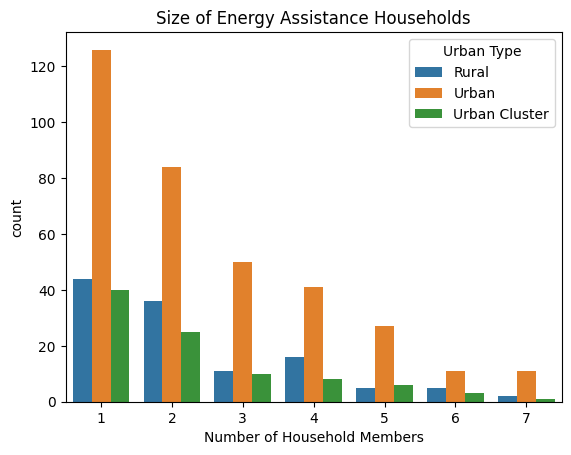

In [6]:
#Barplot of household size for those under energy assistance
sns.countplot(data=energy[energy['ENERGYASST20'] == 1], x='NHSLDMEM', hue='UATYP10')
plt.xlabel('Number of Household Members')
plt.title('Size of Energy Assistance Households')
plt.legend(title='Urban Type', labels=['Rural', 'Urban', 'Urban Cluster'])

Looking at the type of households that receive energy assistance, it is most common for those who are living by themselves or very few other people. Regardless of household size, those in urban areas are more likely to receive energy assistance. This type of information helps us understand what could be confounding variables for energy assistance and electricity usage.

Text(0.5, 1.0, 'Electricity usage if received home energy assistance in 2020 or not')

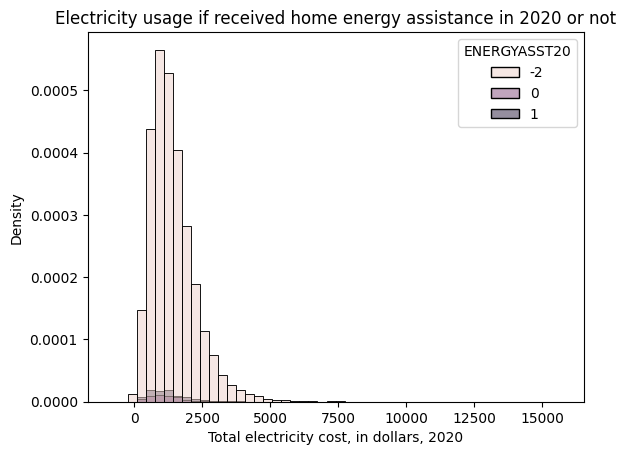

In [7]:
#histogram comparing electricity usage distribution based on energy assistance
sns.histplot(data=energy, x='DOLLAREL', stat='density', hue='ENERGYASST20', bins=50)
plt.xlabel('Total electricity cost, in dollars, 2020')
plt.title('Electricity usage if received home energy assistance in 2020 or not')

Text(0.5, 1.0, 'Electricity usage if received home energy assistance in 2020 or not')

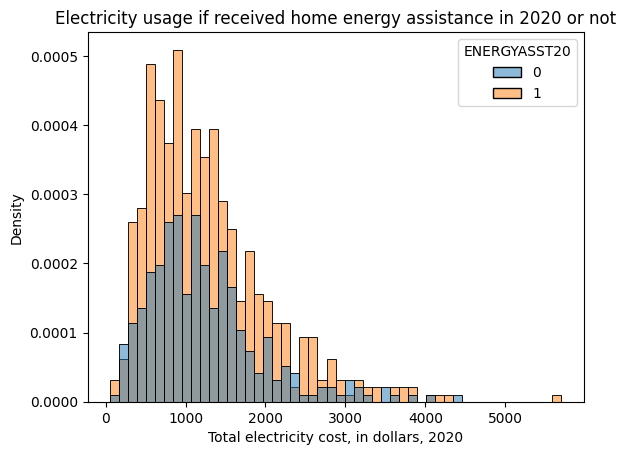

In [8]:
#histogram comparing electricity usage distribution based on energy assistance
sns.histplot(data=energy[energy['ENERGYASST20'] != -2], x='DOLLAREL', stat='density', hue='ENERGYASST20', bins=50)
plt.xlabel('Total electricity cost, in dollars, 2020')
plt.title('Electricity usage if received home energy assistance in 2020 or not')

The histogram of electricity usage based on energy assistance or not indicates that the majority of survey respondents did not appear to be qualified for home energy assistance (as indicated by answering -2). There are still over 500 respondents who answered yes, however, which can be used to answer whether energy assistance causes higher electricity usage. Comparing the shape of the histograms, the distribution of those who answered with -2 is skewed right (with some high outliers), while the distribution of those who answered 1 is generally flatter with no distinct peak.

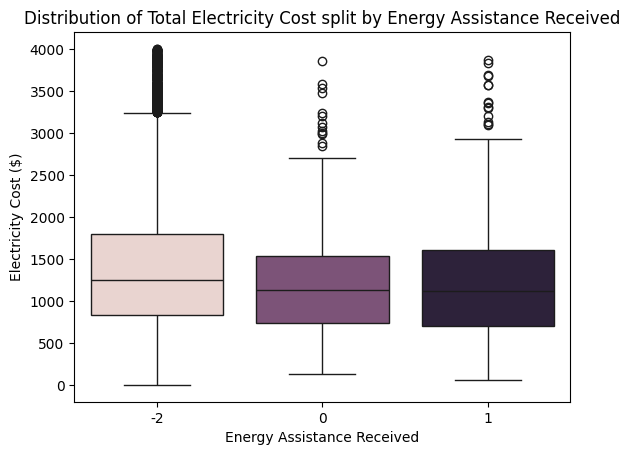

In [9]:
energy_no_dollarel_outlier = energy[(energy["DOLLAREL"]<= 4000)&(energy["DOLLAREL"]>=0)]
sns.boxplot(x='ENERGYASST20', y='DOLLAREL', data=energy_no_dollarel_outlier, hue = 'ENERGYASST20',legend=False)
plt.title('Distribution of Total Electricity Cost split by Energy Assistance Received')
plt.ylabel('Electricity Cost ($)')
plt.xlabel('Energy Assistance Received')
plt.show()

The medians of the three categories of "ENERGYASST20" are very close values with "ENERGYASST20"= -2 being the largest. However, this category has the most data points with the most outliers which may have influenced this result. Median value are not sensitive to outliers though, so not a prominent effect by any means.

### Question 2 
How do the underlying distributions of energy usage differ on the postal code and climate zone levels? 
regionc -> divison -> state-postal/name

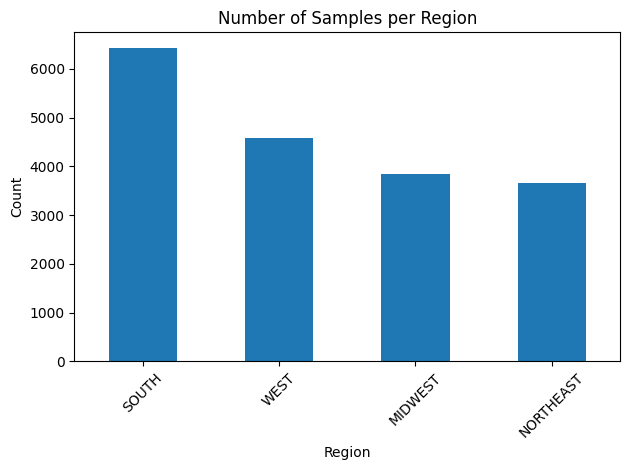

In [10]:
#create histograms for each hierarchy level
#maybe look at means / variances in each group?
#somehow set an idea for the prior? or should we use an uninformative prior


regions = energy['REGIONC'].value_counts()


regions.plot(kind="bar")
plt.title("Number of Samples per Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
group_stats = energy.groupby("REGIONC")["KWH"].agg(["mean", "std", "count"])
print(group_stats)

                   mean          std  count
REGIONC                                    
MIDWEST    10447.489024  6600.833208   3832
NORTHEAST   8321.235286  5579.617805   3657
SOUTH      13513.039961  7806.208806   6426
WEST        9465.055863  6352.142799   4581


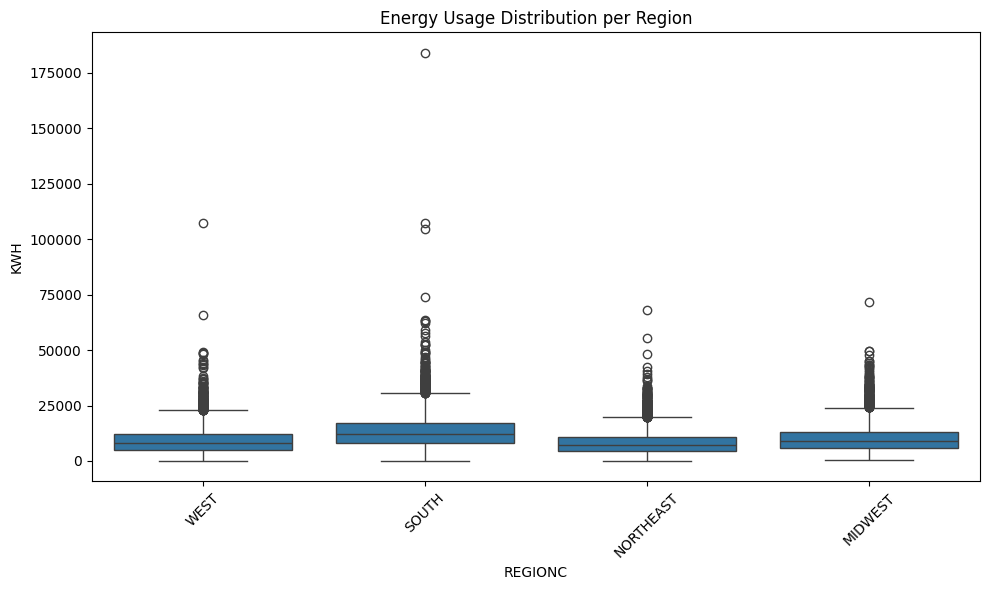

In [12]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=energy, x="REGIONC", y="KWH")
plt.title("Energy Usage Distribution per Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


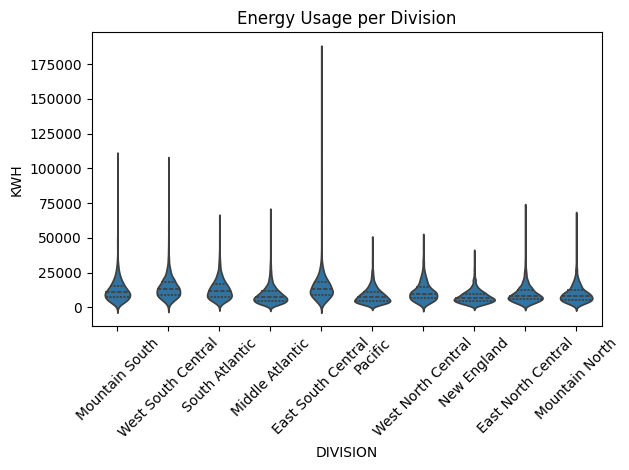

In [13]:
sns.violinplot(data=energy, x="DIVISION", y="KWH", inner="quartile")
plt.title("Energy Usage per Division")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


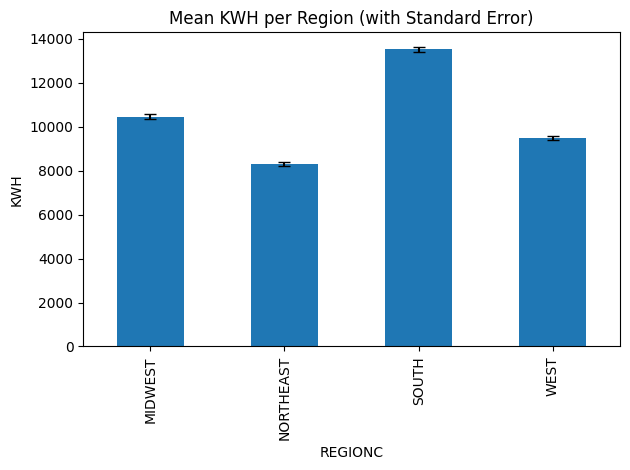

In [14]:
group_stats["sem"] = group_stats["std"] / group_stats["count"]**0.5

group_stats["mean"].plot(kind="bar", yerr=group_stats["sem"], capsize=4)
plt.title("Mean KWH per Region (with Standard Error)")
plt.ylabel("KWH")
plt.tight_layout()
plt.show()


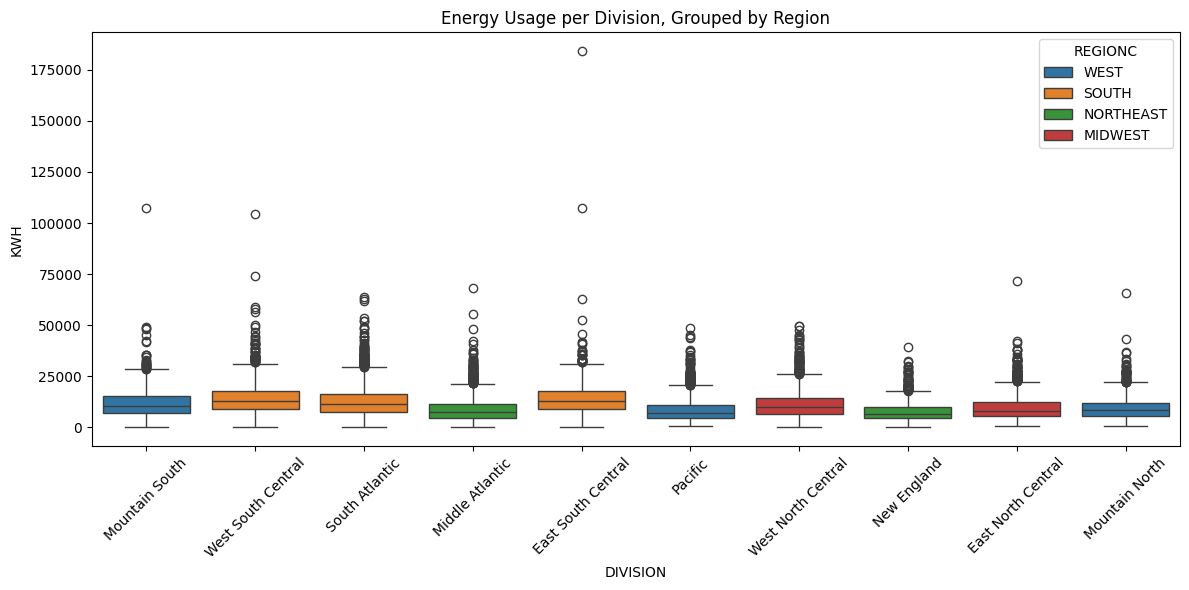

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=energy, x="DIVISION", y="KWH", hue="REGIONC")
plt.title("Energy Usage per Division, Grouped by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


These visualizations above higlight a  hierarchical structure in energy usage across U.S. regions and divisions. The mean KWH per region shows substantial differences,particularly with the South consuming the most energy on average—while the standard errors are small enough to suggest these differences are statistically meaningful. Violin and boxplots at the division level reveal substantial within region variability, including skewed distributions and heavy tails, especially in divisions like the Pacific and Mountain South. This supports the use of a Bayesian hierarchical model, where regional and divisional effects are modeled as group level parameters drawn from shared hyperpriors. The nested variance structure (σ²_total = σ²_region + σ²_division_within_region + σ²_household) justifies partial pooling, which can stabilize estimates for sparsely sampled divisions. 



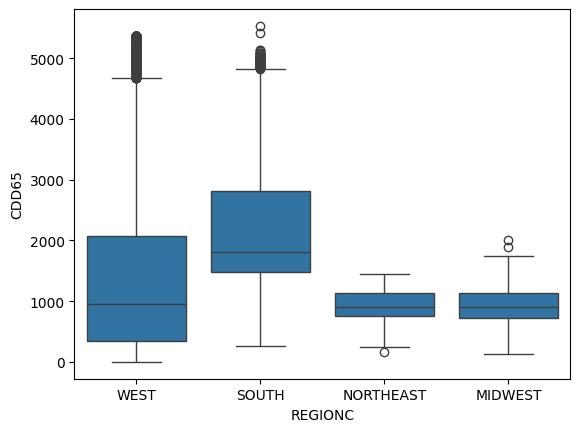

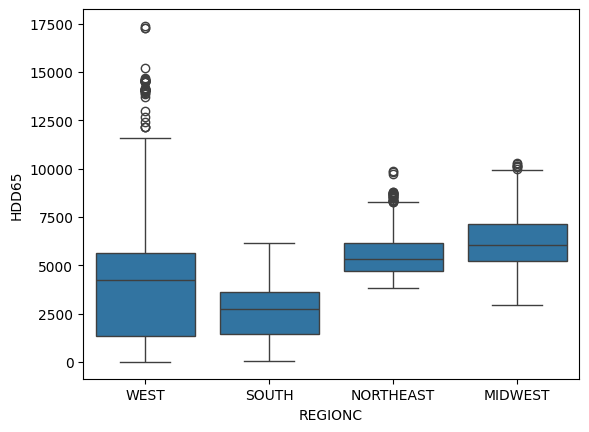

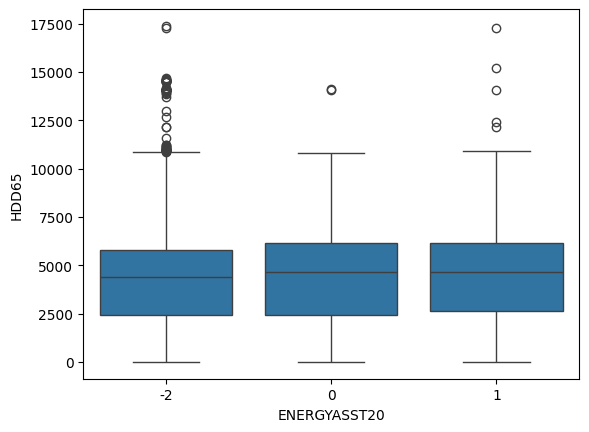

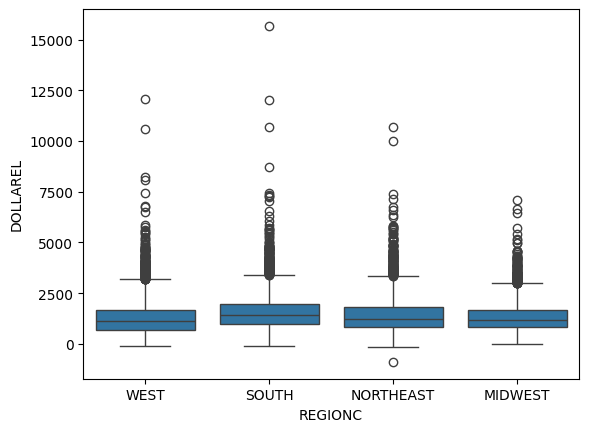

In [16]:
sns.boxplot(data=energy, x="REGIONC", y="CDD65")
plt.show()
sns.boxplot(data=energy, x="REGIONC", y="HDD65")
plt.show()
sns.boxplot(data=energy, x="ENERGYASST20", y="HDD65")
plt.show()
sns.boxplot(data=energy, y="DOLLAREL", x="REGIONC")
plt.show()

Here we present several plots to investigate the relationship between temperature, energy use, and geographic region. These variables and particularly the dependency between them will inform our bayesian hierarchical model, as geographic region is a superlayer to climate zone, and the relation between temperature and energy use will inform our causal DAG. We note that the distributions between hot and cold days differs between regions, and that there are differences in the distributions of energy cost within regions. This will help us select priors for our hierarchical model, and to better understand how temperature affects energy use.

In [17]:
energy[["IECC_climate_code", "BA_climate",  "state_name", "DIVISION"]].groupby(["DIVISION", "IECC_climate_code", "state_name"]).agg("first")


BA_climate
DIVISION           IECC_climate_code state_name             
East North Central 4A                Illinois    Mixed-Humid
                                     Indiana     Mixed-Humid
                                     Ohio        Mixed-Humid
                   5A                Illinois           Cold
                                     Indiana            Cold
...                                                      ...
West South Central 3A                Oklahoma    Mixed-Humid
                                     Texas         Hot-Humid
                   3B                Texas           Hot-Dry
                   4A                Arkansas    Mixed-Humid
                   4B                Texas         Mixed-Dry

[109 rows x 1 columns]

In [45]:
energy[energy["REGIONC"]=="NORTHEAST"]["state_name"].unique()

array(['New Jersey', 'Vermont', 'Rhode Island', 'Maine', 'Massachusetts',
       'Pennsylvania', 'New Hampshire', 'New York', 'Connecticut'],
      dtype=object)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7c7e5ea-85f8-4ba1-a144-22a3b75e26c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>